#### As a student in the Research in Communications program, I can't get past the ticktock dataset. In this paper I will try to derive some insights, perform EDA and make predictions of followers using classical machine learning. 

### Load the standard set of libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

### Create a variable df where our "tiktok-profiles-data" will be located

In [29]:
df = pd.read_csv('./data/profiles_dataset.csv')

In [30]:
df.head(5)

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


### engagement rate is quite an interesting thing, from 1% you can consider that the audience is considered active. 
### From 1% to 3.5% - average rate From 3.5% to 6% - high rate Over 6% - very high rate. 
### For the sake of interest, let's create a new feature where "1" will be where the tik tok profile has 1% or more and "0" where this indicator is below 1%. 
### This way we will try to separate content creator from regular users.

### Average like engagement rate

In [31]:
df.loc[(df['awg_engagement_rate'] >= 0.01) & (df['like_engagement_rate'] <= 0.035)]

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
11,2023-07-27,soyon_on_fire,SOYON_ON_FIRE,ভালো_লাগলে_লাইক_কমেন্ট_এবং_শেয়ার_করবেন___ফলো_ক...,0.013430,0.000577,0.012853,NaN,False,1336,1233,1025,36,NaN,7064432331322311685,https://www.tiktok.com/@soyon_on_fire/video/72...,https://www.tiktok.com/@soyon_on_fire,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
16,2023-08-11,ryanmarkparsons,RYAN-MARK,“Eccentric posho” — The Telegraph.\n📧 Enquirie...,0.019008,0.000180,0.018828,NaN,True,131900,69,4400000,287,NaN,6752910973729981445,https://www.tiktok.com/@ryanmarkparsons/video/...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
19,2023-08-11,_lipsticklinz,_lipsticklinz,Christian based makeup page✝️\nMake your dream...,0.022765,0.001413,0.021353,NaN,False,80400,328,591400,231,NaN,6799039177847948294,https://www.tiktok.com/@_lipsticklinz/video/70...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
35,2023-08-06,baubleandbeam,bauble and beam jewelry!,effortlessly YOU.\nshop link in in IG bio!\nEV...,0.017234,0.000633,0.016601,NaN,False,2258,74,3274,38,NaN,6849458540161221637,https://www.tiktok.com/@baubleandbeam/video/69...,https://www.tiktok.com/@baubleandbeam,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
38,2023-08-06,farahn75,Riyaz14,follow me guys👈👈🌷🌷💔💖👌👌🙏🙏\n Ri...,0.024047,0.000158,0.023889,NaN,False,20600,451,122000,274,NaN,6828419350967780353,https://www.tiktok.com/@farahn75/video/6839353...,https://www.tiktok.com/@farahn75,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2023-07-29,eeh099,ּمۘذڪڕٰا̍ٺ ۛ ּمۘڄۚـﮪﯜڸ,مصصم فيديو ومعلق صوت,0.021499,0.000720,0.020779,NaN,False,913,3471,911,59,NaN,6745571116415599621,https://www.tiktok.com/@eeh099/video/725748581...,https://www.tiktok.com/@eeh099,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
972,2023-08-11,thecolorfulgay,Kurt,I don't even know what I'm doing🌈🖤,0.016050,0.000560,0.015490,https://linktr.ee/ColrfulGayTV,False,8210,244,104100,663,NaN,155000093262249984,https://www.tiktok.com/@thecolorfulgay/video/7...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
973,2023-08-11,yumiferrer19,yumiferrer19,♡︎𝐘𝐮𝐦𝐚𝐥𝐚𝐲 𝐅𝐞𝐫𝐫𝐞𝐫♡︎\n✰merchera✰\n☘︎ᴀʟʙᴀᴄᴇᴛᴇ☘︎\n...,0.017954,0.001203,0.016751,NaN,False,5105,5091,30300,248,NaN,6642751476237467653,https://www.tiktok.com/@yumiferrer19/video/717...,https://www.tiktok.com/@undefined,https://p77-sign-va.tiktokcdn.com/tos-maliva-a...
988,2023-08-11,dineshdsk1,Dinesh Dsk,marwadi choro..🍷\nnightlife..🍷,0.019536,0.000319,0.019216,NaN,False,2596,785,20900,78,NaN,255347147712421888,https://www.tiktok.com/@dineshdsk1/video/68389...,https://www.tiktok.com/@undefined,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...


### High like engagement rate

In [32]:
df.loc[(df['awg_engagement_rate'] >= 0.035) & (df['like_engagement_rate'] <= 0.06)]

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
14,2023-08-11,itshoneydone,@itshoneydone | Kayla,Let me help you turn your honey-do list into h...,0.054740,0.000299,0.054440,https://linktr.ee/itshoneydone,False,288400,120,2300000,334,NaN,6814240381166158854,https://www.tiktok.com/@itshoneydone/video/726...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
22,2023-07-28,dkanik34,Prince,Prince,0.051739,0.006661,0.045077,NaN,False,1042,1423,1717,34,NaN,6956249750804120582,https://www.tiktok.com/@dkanik34/video/7139535...,https://www.tiktok.com/@dkanik34,https://p16-sign-useast2a.tiktokcdn.com/tos-us...
23,2023-08-04,jessicaw521,Jessica81,from Georgia love my family and friends. I lik...,0.045433,0.005229,0.040205,NaN,False,1694,1673,2387,28,NaN,6929156882218189830,https://www.tiktok.com/@jessicaw521/video/7108...,https://www.tiktok.com/@jessicaw521,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,2023-08-12,nosebled,kj,i’ve never gotten a nosebleed in my life\n20\n...,0.038959,0.000395,0.038565,https://linktr.ee/nosebled,False,474000,666,18100000,1763,NaN,55952826815762432,https://www.tiktok.com/@nosebled/video/7203802...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
959,2023-08-12,anniesbucketlist,Anniesbucketlist,"Sydney experiences, food & travel 🌻 say hi: co...",0.043898,0.000554,0.043344,NaN,False,77600,389,3100000,240,NaN,6728324985667273733,https://www.tiktok.com/@anniesbucketlist/video...,https://www.tiktok.com/@undefined,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
962,2023-08-10,larrymata4wd,Larry Mata,@larry4wd director de @mata_vieira_ranch,0.040744,0.000148,0.040596,NaN,False,85300,1343,317300,178,NaN,6827608711008306182,https://www.tiktok.com/@larrymata4wd/video/725...,https://www.tiktok.com/@larrymata4wd,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
963,2023-08-06,jecmari.balza,jecmari Balza,sigueme y te sigo,0.035976,0.001481,0.034495,NaN,False,656,587,3501,250,NaN,6966652901394072581,https://www.tiktok.com/@jecmari.balza/video/72...,https://www.tiktok.com/@jecmari.balza,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...


### High like engagement rate

In [33]:
df.loc[(df['awg_engagement_rate'] >= 0.06) & (df['videos_count'] >= 30)]

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
12,2023-08-11,laurenwolfe,Lauren Wolfe,Hi besties\nnyc\n💕,0.080566,0.000160,0.080406,https://linktr.ee/_laurenwolfe_,True,1000000,786,92300000,1117,NaN,6718235424344687621,https://www.tiktok.com/@laurenwolfe/video/7265...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
15,2023-08-11,curlyheadkay3,Hennessy🤎🦋,Hair influencer 💈💇🏽‍♀️ \nSpread the gospel ✝️ ...,0.185317,0.000512,0.184805,NaN,False,40400,1132,248700,33,NaN,6803754038946956294,https://www.tiktok.com/@curlyheadkay3/video/72...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
20,2023-08-11,lottaavacada,LottaAvacada,Most based verse:\n2 Kings 2:23-24,0.932520,0.011547,0.920973,NaN,False,33000,183,1100000,37,NaN,6651331036423340038,https://www.tiktok.com/@lottaavacada/video/704...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
24,2023-08-04,nbut_tia,Tya,https://youtu.be/rqeQj198fNw,0.130422,0.005428,0.124994,NaN,False,579,318,5115,65,NaN,6540190974906925062,https://www.tiktok.com/@nbut_tia/video/7252764...,https://www.tiktok.com/@nbut_tia,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
27,2023-08-04,jesuthasanjesu344gmail.c,jesuthasanjesu,l am only single no love 💔 no girls friend i ...,0.072133,0.005303,0.066830,NaN,False,1460,99,8546,65,NaN,7037517000462173190,https://www.tiktok.com/@jesuthasanjesu344gmail...,https://www.tiktok.com/@jesuthasanjesu344gmail.c,https://p16-sign-useast2a.tiktokcdn.com/tos-us...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2023-08-11,rosebudbulldogs,Rosebud Bulldogs,Click the link - Our Website,0.072239,0.000806,0.071433,https://linktr.ee/rosebudbullldogs,False,101700,297,2200000,175,NaN,6767837071766094853,https://www.tiktok.com/@rosebudbulldogs/video/...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
994,2023-07-30,6_.hmr,مَيممہَ 🍓🍫💕,يا صلاتي السادسة الـ ما الها موعد\nبـكيف أذان ...,0.422292,0.011041,0.411252,https://t.me/mxh_488,False,678,42,11600,110,NaN,6774416767419925509,https://www.tiktok.com/@6_.hmr/video/705729235...,https://www.tiktok.com/@6_.hmr,https://p77-sign-sg.tiktokcdn.com/aweme/720x72...
995,2023-07-30,lpk.jp,Hinode Abadi Indonesia,Yayasan Hinode (SO)\nLembaga Pelatihan Bahasa ...,0.076391,0.004584,0.071807,NaN,False,956,294,4028,110,NaN,6950843413404435457,https://www.tiktok.com/@lpk.jp/video/726037681...,https://www.tiktok.com/@lpk.jp,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
997,2023-08-12,djbigkev,DJ_BigKev,"📍San Jose, CA\nGood Music & Good Vibes\n🎧🎶🎉\nI...",0.072184,0.001001,0.071183,https://soundcloud.com/user-176043326,False,12100,256,102400,89,NaN,6710967357261530117,https://www.tiktok.com/@djbigkev/video/7254431...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...


### What is interesting is that 6%, i.e. very high level of user engagement is the most of all 228 profiles from a sample of 1000 people 
### For the sake of representativeness I took at least 30 videos, because it happens very often that a person released one video that shot and it has nothing to do with a conventional content creator, for whom tik tok is a job.

In [34]:
df["probably_content_creator"] = np.where(df['awg_engagement_rate'] >= 0.01, '1', '0')

In [35]:
df.head(3)

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url,probably_content_creator
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...,1
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,1
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...,0


### From the idea for the future, you could check the description from profiles and pick out from there all kinds of "youtube" "telegram" "twitch" those words that would clearly indicate an affiliation with content creators

## Let`s check corr


In [36]:
df.corr()

ValueError: could not convert string to float: '2023-08-01'

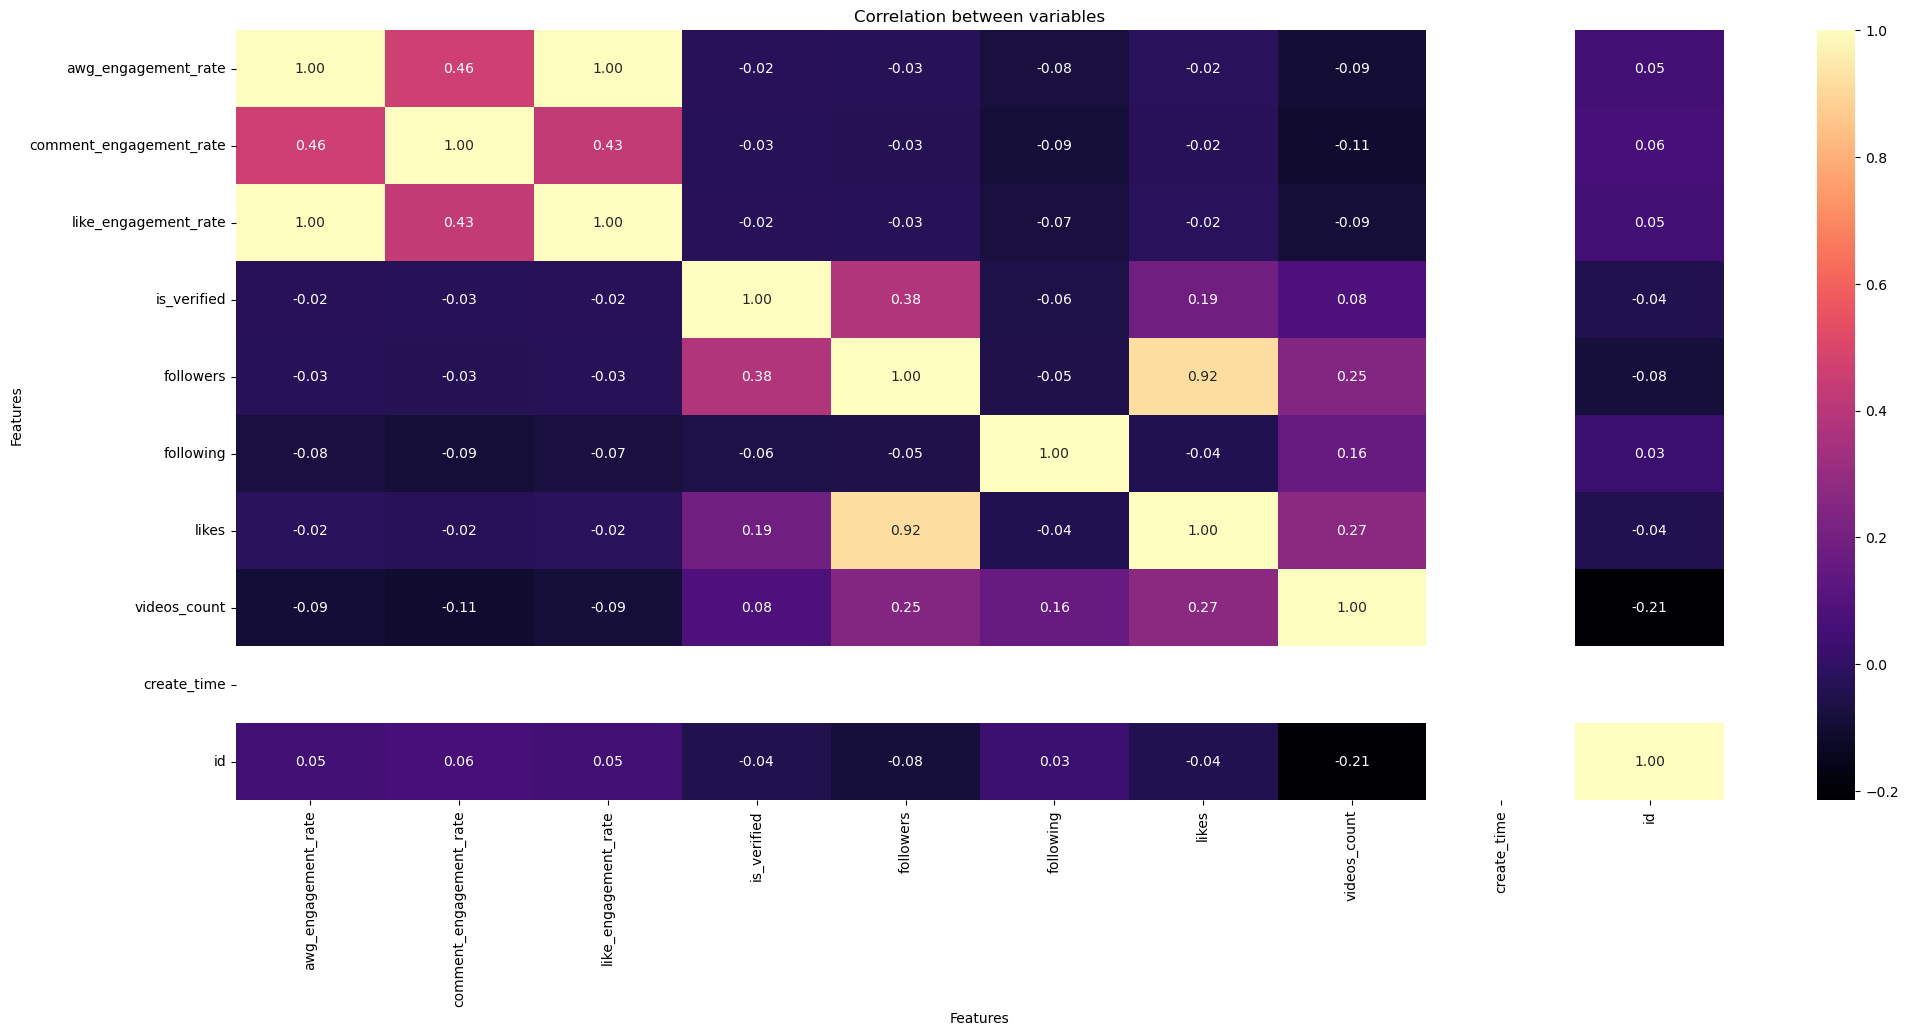

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Followers and likes is an obvious thing, the more people there are, the greater the chance of likes. 
### That said, there is a correlation between a verified user and followers.

In [ ]:
d = pd.DataFrame(df["is_verified"].value_counts())
fig = px.pie(d, values = "is_verified", names = ["Not verified", "Verified"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"is_verified","is_verified":"Number of Profiles"})
fig.update_layout(title = dict(text = "Pie Chart of is_verified Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

In [ ]:
df['followers'].max()

14500000

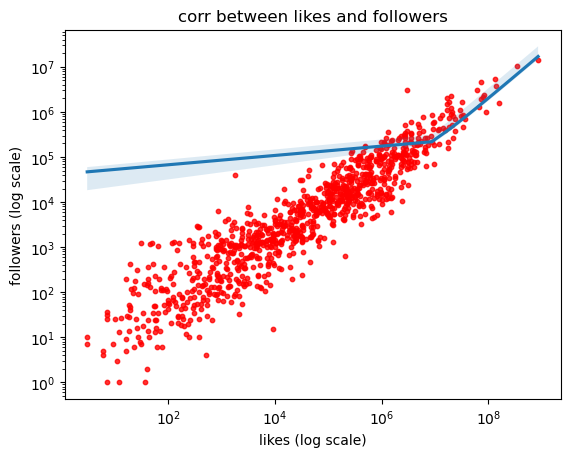

In [ ]:
sns.regplot(x='likes', y='followers', data=df, scatter_kws={'s': 10, 'color': 'red'})
plt.xlabel('likes (log scale)')
plt.ylabel('followers (log scale)')
plt.title('corr between likes and followers')
plt.xscale('log')
plt.yscale('log')
plt.show()


# Models

## Let's try to use our data and predict whether or not a user is a content creator

### Import library to split into test and training dates + metrics + remove warnings

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
X = df[['awg_engagement_rate','comment_engagement_rate', 'like_engagement_rate', 'is_verified', 'followers','following', 'likes','videos_count']] 
y = df['probably_content_creator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [ ]:
acc_knn = accuracy_score(y_test,knn_predict)
f1_knn = f1_score(y_test, knn_predict, pos_label='1')
prec_knn = precision_score(y_test, knn_predict, pos_label='1')
rec_knn = recall_score(y_test, knn_predict, pos_label='1')
results_knn = pd.DataFrame([['KNN', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.7675,0.86057,0.790634,0.944079
